<a href="https://colab.research.google.com/github/aicha001/introduction-to-business-programming/blob/main/Assignment_Enron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title :** Business Report Notebook- **Enron Email Analysis**

###**Name: Aicha Pooloo**
###**StudentId: 20820233**

##**INTRODUCTION**


Enron corporation was one of the largest and most powerful business situated in the United States.It was an American energy company that resulted in bankrupty in 2001 leaving thousands of its employees jobless overnight ( Bondareko 2001). Due to an increase in competition, the business profitability started to decrease drastically thus tempting the company to engage itself in suspicious accounting practicesto prevent the issues from being revealed.Since Enron engaged itself in "special purpose entities" (SPEs),it had to keep some data off book to prevent its investors from knowing about its downfall (Thomas 2002). The people who were at the head of the company were arrested for the massive fraudulent act (Simon 2021).Hence investigation was made throughout the email sent from the company to be able to know the source and wrong practice of employees and to know exactly who were the main culprits.The aim of this report is to analyse data and reveal email usage of Enron overtime  with its clients.

##**Coding**

In [25]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.2 MB 1.7 MB/s 


In [26]:
#importing Eron database
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-28 19:20:57--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-28 19:20:58--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  16.6MB/s    in 71s     

2022-05-28 19:22:09 (11.5 MB/s) - ‘enron.db’ saved [853819392/853819392]



In [27]:
# importing sqlite3 and pandas
import sqlite3
import pandas


In [28]:
conn=sqlite3.connect('enron.db')
cur=conn.cursor()

In [29]:
#List table for employee
sql= """
CREATE TABLE IF NOT EXISTS employeelist(
    userid INT PRIMARY KEY,
    Fname TEXT,
    Lname TEXT,
    email_id REAL,
    email_id2 REAL,
    email_id3 REAL,
    email_id4 REAL,
    folder TEXT,
    status TEXT);
"""
#Execute query and commit transaction
cur.execute(sql)
conn.commit()


In [30]:
#Creating a table for message
sql= """
CREATE TABLE IF NOT EXISTS message(
  mid INT PRIMARY KEY,
  sendermail TEXT,
  date REAL,
  subject_of_email TEXT,
  message TEXT,
  body_para TEXT,
  folder TEXT);
"""
#execute query and commit transaction
cur.execute(sql)
conn.commit()

In [31]:
# creating the table for recipient information
sql="""
CREATE TABLE IF NOT EXISTS recipient_info(
  rid TEXT PRIMARY KEY,
  mid TEXT,
  rtype REAL,
  rvalue TEXT);
"""

#execute query and commit transaction
cur.execute(sql)
conn.commit()

In [32]:
#creating the table for Reference information
sql="""
CREATE TABLE IF NOT EXISTS ref_info(
  rfid TEXT PRIMARY KEY,
  mid TEXT,
  reference REAL);

"""
#execute query an commit transaction
cur.execute(sql)
conn.commit()

###**Emails sent by employee**

In [57]:
sql="""
SELECT sender, count(mid) AS message_count
      FROM message
      GROUP BY sender
      ORDER BY message_count
      DESC
      LIMIT 12;
  
"""
#execute the sql query
rows=cur.execute(sql)
for row in rows:
  print(row)

('jeff.dasovich@enron.com', 6273)
('j.kaminski@enron.com', 5838)
('kay.mann@enron.com', 5100)
('sara.shackleton@enron.com', 4797)
('tana.jones@enron.com', 4437)
('chris.germany@enron.com', 3686)
('no.address@enron.com', 3511)
('enron.announcements@enron.com', 2838)
('matthew.lenhart@enron.com', 2784)
('debra.perlingiere@enron.com', 2549)
('pete.davis@enron.com', 2500)
('steven.j.kean@enron.com', 2278)


###**No of messages sent per day**

In [58]:
sql="""
SELECT date(Date) AS date_emailsent,count(mid) AS message_count
    FROM message
    GROUP BY date_emailsent
    ORDER BY date_emailsent;
"""

#execute the sql query
rows = cur.execute(sql)
for row in rows :
  print(row)


('0001-05-30', 2)
('0001-06-18', 1)
('0001-07-24', 1)
('0001-08-01', 1)
('0001-08-06', 1)
('0001-08-13', 1)
('0001-08-21', 1)
('0001-08-22', 1)
('0001-08-26', 1)
('0001-08-27', 1)
('0001-08-28', 4)
('0001-08-30', 1)
('0001-09-03', 1)
('0001-09-05', 2)
('0001-09-13', 1)
('0001-09-17', 1)
('0001-09-19', 1)
('0001-09-20', 1)
('0001-09-21', 1)
('0001-09-26', 1)
('0001-10-04', 1)
('0001-10-05', 1)
('0001-10-08', 1)
('0001-10-12', 1)
('0001-10-15', 3)
('0001-10-16', 3)
('0001-10-17', 4)
('0001-10-18', 8)
('0001-10-19', 1)
('0001-10-21', 1)
('0001-10-22', 6)
('0001-10-24', 1)
('0001-10-25', 4)
('0001-10-26', 8)
('0001-10-29', 18)
('0001-10-30', 1)
('0001-11-02', 1)
('0001-11-08', 1)
('0001-11-14', 1)
('0001-11-15', 1)
('0001-11-19', 10)
('0001-11-20', 3)
('0001-11-21', 7)
('0001-11-22', 3)
('0001-11-23', 1)
('0001-11-25', 1)
('0001-11-26', 9)
('0001-11-27', 15)
('0001-11-28', 2)
('0001-11-29', 2)
('0001-11-30', 1)
('0001-12-03', 3)
('0001-12-04', 2)
('0001-12-06', 2)
('0001-12-07', 1)
('0001-

In [59]:
import pandas as pd
sql = """
SELECT date(date) AS date_emailsent, count(mid) AS message_count
   FROM message
   GROUP BY date_emailsent
   ORDER BY date_emailsent;

"""
#loading the selected data onto a dataframe.
messages_df  = pd.read_sql_query(sql,conn)
messages_df


,date_emailsent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


###**Graph plotting**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


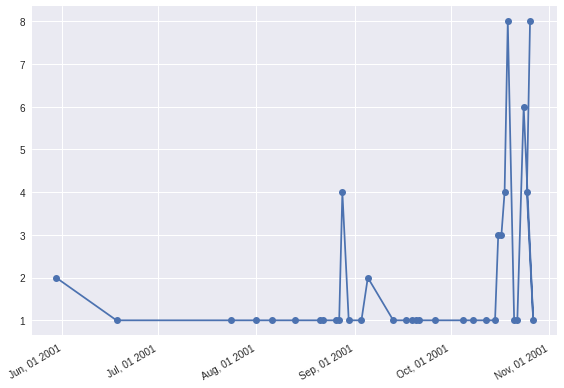

In [66]:
import pandas as pd
from datetime import datetime,timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
dates = [
         datetime(2001,5,30),
         datetime(2001,6,18),
         datetime(2001,7,24),
         datetime(2001,8,1),
         datetime(2001,8,6),
         datetime(2001,8,13),
         datetime(2001,8,21),
         datetime(2001,8,22),
         datetime(2001,8,26),
         datetime(2001,8,27),
         datetime(2001,8,28),
         datetime(2001,8,30),
         datetime(2001,9,3),
         datetime(2001,9,5),
         datetime(2001,9,13),
         datetime(2001,9,17),
         datetime(2001,9,19),
         datetime(2001,9,20),
         datetime(2001,9,21),
         datetime(2001,9,26),
         datetime(2001,10,5),
         datetime(2001,10,8),
         datetime(2001,10,12),
         datetime(2001,10,15),
         datetime(2001,10,16),
         datetime(2001,10,17),
         datetime(2001,10,18),
         datetime(2001,10,19),
         datetime(2001,10,21),
         datetime(2001,10,22),
         datetime(2001,10,24),
         datetime(2001,10,27),
         datetime(2001,10,25),
         datetime(2001,10,26),
]
y = [2,1,1,1,1,1,1,1,1,1,4,1,1,2,1,1,1,1,1,1,1,1,1,1,3,3,4,8,1,1,6,1,4,8]
plt.plot_date(dates, Y, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()


##**Analysis**

There has been a drastic fall in June 2001( from approximately 2 emails to 1 emails) and then a constant number of email has been sent from July 2001 until the last 8 months of August 2001.There has been a substantial growth in the number of mail sent at the end of August 2001 and it then gradually decreases before the start of September 2001. Then the number of email sent from the first four month of September until mid-October remained constant.There has been a drastic increase as from mid october to the end of October.Hence it can be concluded that more emails were being sent at the end of October 2001.

##**Discussion**

The total actual email files of Enron company from August 2000 to December 2001 ( 15 months) is 717,102. The number of email sent out of this sum is 68,979(Computational Research Division, n.d.).The Enron company would have build a power plant and the forcasted profit would be written in its book.If the profit gain from the power plant would been less that that they have predicted, the company would transfer the loss to an off-book corporation.The loss would have gone unnoticed (Troy 2021).Hence, it can be noted that Enron depend greatly upon its company's reputation in terms of profitability.

##**Conclusion**

The aim of this report is to analyse the number of emails sent from Enron company to be able to reveal the trends and patterns for a particular time period (year 2001).The use of table and graphs has allowed us to understand the trend.This report involves coding followed by analysis of graphs and table and then a discussion. The discussion involves data taken from different websites on the different dataset provided. It also involves strategic that would have been taken to cover the loss of the business rather than record it in the book-keeping.

##**References**

Bondareko, Peter.2001."Enron Scandal".*Britannica*.
  https://www.britannica.com/event/Enron-scandal

Computational Research Division.n.d.Analyzing Enron Data:Bitmap Indexing OutperformsMySQL Queries by Several Orders of Magnitude.https://www.osti.gov/servlets/purl/881612-KQlHWx/

Simon,Constable.2021."How the Enron Scandal changed American Business Forever".*TIME*.https://time.com/6125253/enron-scandal-changed-american-business-forever/

Thomas, C.William.2002."The Rise and Fall of Enron".*Journal of Accountancy*.https://www.journalofaccountancy.com/issues/2002/apr/theriseandfallofenron.html

Troy,Segal.2021."Enron Scandal: The Fall of a Wall Street Darling".*Investopedia*.https://www.investopedia.com/updates/enron-scandal-summary/



> 












